<a href="https://colab.research.google.com/github/Nithisrizoya/Microsoft---Classifying-Cybersecurity-Incidents/blob/main/MSCyberpro_Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Microsoft---Classifying-Cybersecurity-Incidents**

1. **Data Exploration and Understanding**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

**Train Dataset**

In [ ]:
import zipfile
import pandas as pd

# Step 1: Unzip the file
with zipfile.ZipFile('new_train_sample.zip', 'r') as zip_ref:
    zip_ref.extractall()  # Extracts to the current directory


In [ ]:
df_train = pd.read_csv('new_train_sample.csv')
df_train.head()


,Unnamed: 0,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,...,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,5172780,1709396985476,26,18583,687462,2024-06-06T05:56:47.000Z,31,813,Malware,NaN,...,NaN,NaN,5,66,NaN,Suspicious,Malicious,242,1445,10630
1,8470561,927712939180,33,5065,3990,2024-06-03T10:45:09.000Z,38,25,Impact,NaN,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
2,5897583,1090921697002,201,150787,807590,2024-06-13T03:36:40.000Z,419,444,Execution,T1047;T1059;T1053;T1569;T1059.001;T1053.002;T1...,...,NaN,Destination,5,66,NaN,NaN,NaN,242,1445,10630
3,3288552,1434519079555,204,108287,28575,2024-06-08T16:54:57.000Z,44,1233,SuspiciousActivity,NaN,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
4,4060961,1005022347708,54,528202,1458226,2024-06-09T02:48:01.000Z,102,58829,Exfiltration,NaN,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630


In [ ]:
df_train.iloc[0]

,0
Unnamed: 0,5172780
Id,1709396985476
OrgId,26
IncidentId,18583
AlertId,687462
Timestamp,2024-06-06T05:56:47.000Z
DetectorId,31
AlertTitle,813
Category,Malware
MitreTechniques,NaN


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4758418 entries, 0 to 4758417
Data columns (total 46 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   Id                  int64  
 2   OrgId               int64  
 3   IncidentId          int64  
 4   AlertId             int64  
 5   Timestamp           object 
 6   DetectorId          int64  
 7   AlertTitle          int64  
 8   Category            object 
 9   MitreTechniques     object 
 10  IncidentGrade       object 
 11  ActionGrouped       object 
 12  ActionGranular      object 
 13  EntityType          object 
 14  EvidenceRole        object 
 15  DeviceId            int64  
 16  Sha256              int64  
 17  IpAddress           int64  
 18  Url                 int64  
 19  AccountSid          int64  
 20  AccountUpn          int64  
 21  AccountObjectId     int64  
 22  AccountName         int64  
 23  DeviceName          int64  
 24  NetworkMessageId    int6

In [ ]:
pd.set_option('display.max_columns', None)
df_train.head(1)

,Unnamed: 0,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,ActionGrouped,ActionGranular,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,EmailClusterId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,ThreatFamily,FileName,FolderPath,ResourceIdName,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,5172780,1709396985476,26,18583,687462,2024-06-06T05:56:47.000Z,31,813,Malware,NaN,BenignPositive,NaN,NaN,File,Related,98799,1296,360606,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,Casdet,4132,4227,3586,NaN,NaN,5,66,NaN,Suspicious,Malicious,242,1445,10630


In [ ]:
df_train.nunique()

,0
Unnamed: 0,4758418
Id,657035
OrgId,5607
IncidentId,432289
AlertId,1163873
Timestamp,723647
DetectorId,7908
AlertTitle,80121
Category,20
MitreTechniques,1166


In [ ]:
df_train.duplicated().sum()

0

In [ ]:
df_train.drop_duplicates(inplace=True)

In [ ]:
print(df_train.duplicated().sum())

0


In [ ]:
print(df_train.isna().sum())

Unnamed: 0                  0
Id                          0
OrgId                       0
IncidentId                  0
AlertId                     0
Timestamp                   0
DetectorId                  0
AlertTitle                  0
Category                    0
MitreTechniques       2733136
IncidentGrade           25775
ActionGrouped         4730205
ActionGranular        4730205
EntityType                  0
EvidenceRole                0
DeviceId                    0
Sha256                      0
IpAddress                   0
Url                         0
AccountSid                  0
AccountUpn                  0
AccountObjectId             0
AccountName                 0
DeviceName                  0
NetworkMessageId            0
EmailClusterId        4710241
RegistryKey                 0
RegistryValueName           0
RegistryValueData           0
ApplicationId               0
ApplicationName             0
OAuthApplicationId          0
ThreatFamily          4721038
FileName  

In [ ]:
df_train.shape

(4758418, 46)

**Data Cleaning**

In [ ]:
missing_percentage = df_train.isnull().mean() * 100

In [ ]:
columns_to_drop = missing_percentage[missing_percentage > 50].index

In [ ]:
data_cleaned = df_train.drop(columns=columns_to_drop)

In [ ]:
data_cleaned.shape

(4758418, 36)

In [ ]:
data_cleaned.isnull().sum()

,0
Unnamed: 0,0
Id,0
OrgId,0
IncidentId,0
AlertId,0
Timestamp,0
DetectorId,0
AlertTitle,0
Category,0
IncidentGrade,25775


In [ ]:
data_cleaned.IncidentGrade.unique()

array(['BenignPositive', 'TruePositive', 'FalsePositive', nan],
      dtype=object)

In [ ]:
data_cleaned.dropna(subset=['IncidentGrade'], inplace=True)

In [ ]:
data_cleaned.IncidentGrade.unique()

array(['BenignPositive', 'TruePositive', 'FalsePositive'], dtype=object)

In [ ]:
print(data_cleaned.shape)
data_cleaned.head()

(4732643, 36)


,Unnamed: 0,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City
0,5172780,1709396985476,26,18583,687462,2024-06-06T05:56:47.000Z,31,813,Malware,BenignPositive,File,Related,98799,1296,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,4132,4227,3586,5,66,242,1445,10630
1,8470561,927712939180,33,5065,3990,2024-06-03T10:45:09.000Z,38,25,Impact,BenignPositive,Machine,Impacted,98799,138268,360606,160396,441377,673934,425863,453297,3142,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630
2,5897583,1090921697002,201,150787,807590,2024-06-13T03:36:40.000Z,419,444,Execution,BenignPositive,Machine,Impacted,98799,138268,360606,160396,441377,673934,425863,453297,4181,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630
3,3288552,1434519079555,204,108287,28575,2024-06-08T16:54:57.000Z,44,1233,SuspiciousActivity,TruePositive,File,Related,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,97007,9177,3586,5,66,242,1445,10630
4,4060961,1005022347708,54,528202,1458226,2024-06-09T02:48:01.000Z,102,58829,Exfiltration,BenignPositive,File,Impacted,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,39978,114449,3586,5,66,242,1445,10630


In [ ]:
data_cleaned.nunique()

,0
Unnamed: 0,4732643
Id,642342
OrgId,5236
IncidentId,421530
AlertId,1150459
Timestamp,719084
DetectorId,7369
AlertTitle,74710
Category,20
IncidentGrade,3


In [ ]:
print(data_cleaned.shape)
print(data_cleaned.Id.nunique())

(4732643, 36)
642342


In [ ]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4732643 entries, 0 to 4758417
Data columns (total 36 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Unnamed: 0          int64 
 1   Id                  int64 
 2   OrgId               int64 
 3   IncidentId          int64 
 4   AlertId             int64 
 5   Timestamp           object
 6   DetectorId          int64 
 7   AlertTitle          int64 
 8   Category            object
 9   IncidentGrade       object
 10  EntityType          object
 11  EvidenceRole        object
 12  DeviceId            int64 
 13  Sha256              int64 
 14  IpAddress           int64 
 15  Url                 int64 
 16  AccountSid          int64 
 17  AccountUpn          int64 
 18  AccountObjectId     int64 
 19  AccountName         int64 
 20  DeviceName          int64 
 21  NetworkMessageId    int64 
 22  RegistryKey         int64 
 23  RegistryValueName   int64 
 24  RegistryValueData   int64 
 25  ApplicationId       int

In [ ]:
data_cleaned['Timestamp'] = pd.to_datetime(data_cleaned['Timestamp'])

In [ ]:
data_cleaned['Timestamp'].head()

,Timestamp
0,2024-06-06 05:56:47+00:00
1,2024-06-03 10:45:09+00:00
2,2024-06-13 03:36:40+00:00
3,2024-06-08 16:54:57+00:00
4,2024-06-09 02:48:01+00:00


In [ ]:
# Extract day, month, and hour from the Timestamp
data_cleaned['Day'] = data_cleaned['Timestamp'].dt.day
data_cleaned['Month'] = data_cleaned['Timestamp'].dt.month
data_cleaned['Hour'] = data_cleaned['Timestamp'].dt.hour

# Drop the original Timestamp column
data_cleaned.drop('Timestamp', axis=1, inplace=True)

print(data_cleaned.head())

   Unnamed: 0             Id  OrgId  IncidentId  AlertId  DetectorId  \
0     5172780  1709396985476     26       18583   687462          31   
1     8470561   927712939180     33        5065     3990          38   
2     5897583  1090921697002    201      150787   807590         419   
3     3288552  1434519079555    204      108287    28575          44   
4     4060961  1005022347708     54      528202  1458226         102   

   AlertTitle            Category   IncidentGrade EntityType EvidenceRole  \
0         813             Malware  BenignPositive       File      Related   
1          25              Impact  BenignPositive    Machine     Impacted   
2         444           Execution  BenignPositive    Machine     Impacted   
3        1233  SuspiciousActivity    TruePositive       File      Related   
4       58829        Exfiltration  BenignPositive       File     Impacted   

   DeviceId  Sha256  IpAddress     Url  AccountSid  AccountUpn  \
0     98799    1296     360606  160396

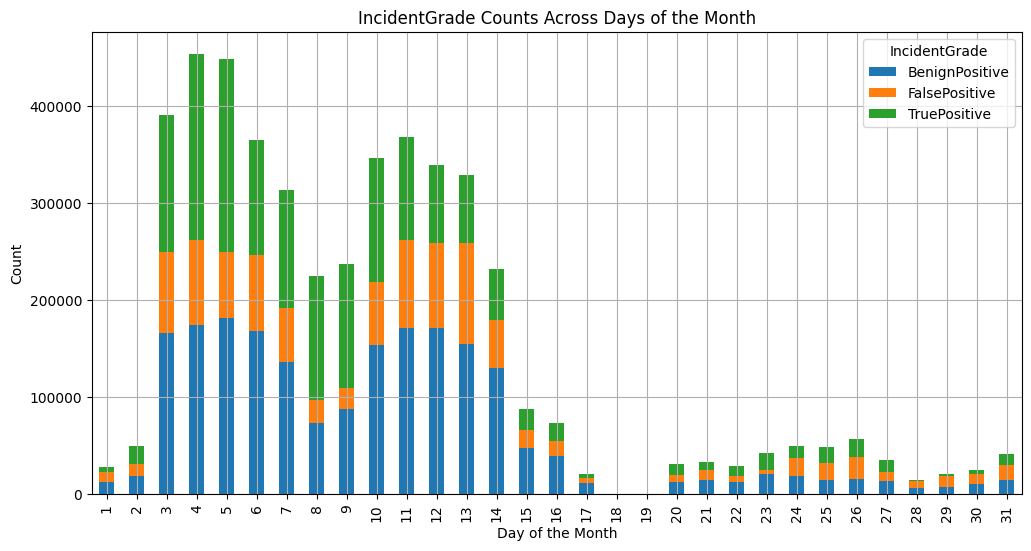

In [ ]:
# Aggregate data
day_incident_grade = data_cleaned.groupby(['Day', 'IncidentGrade']).size().unstack()

# Plot
day_incident_grade.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Day of the Month')
plt.ylabel('Count')
plt.title('IncidentGrade Counts Across Days of the Month')
plt.legend(title='IncidentGrade')
plt.grid(True)
plt.show()

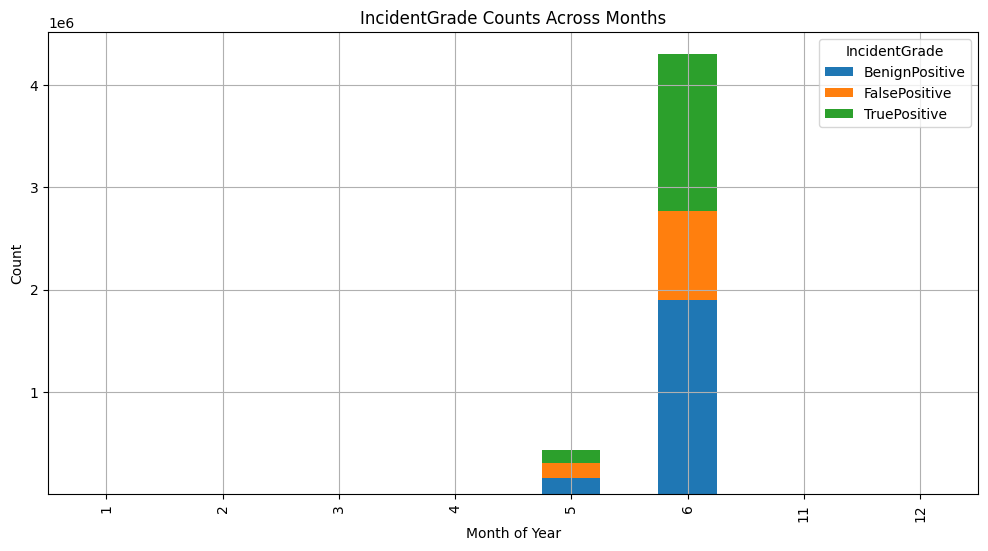

In [ ]:
# Aggregate data
month_incident_grade = data_cleaned.groupby(['Month', 'IncidentGrade']).size().unstack()

# Plot
month_incident_grade.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Month of Year')
plt.ylabel('Count')
plt.title('IncidentGrade Counts Across Months')
plt.legend(title='IncidentGrade')
plt.grid(True)
plt.show()


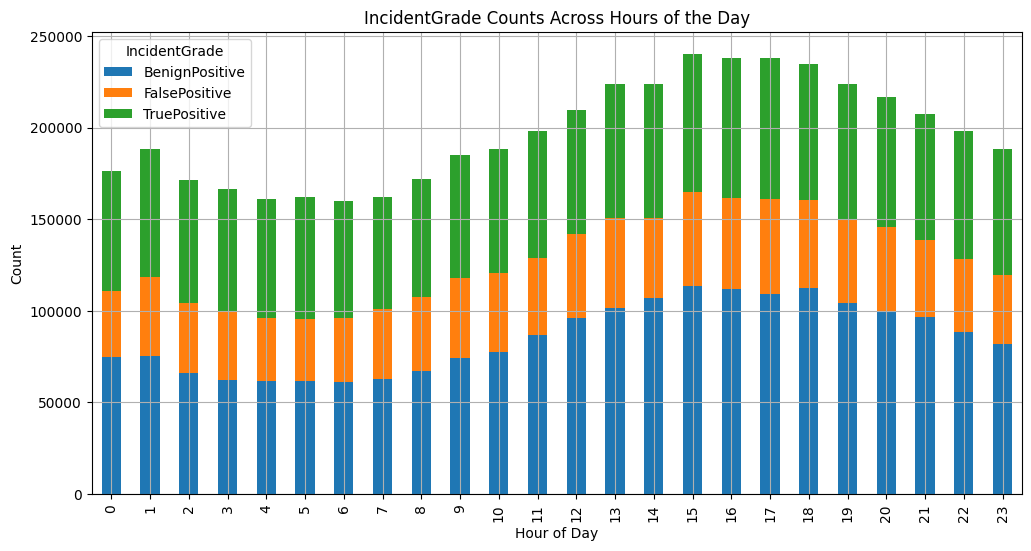

In [ ]:
# Aggregate data
hour_incident_grade = data_cleaned.groupby(['Hour', 'IncidentGrade']).size().unstack()

# Plot
hour_incident_grade.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.title('IncidentGrade Counts Across Hours of the Day')
plt.legend(title='IncidentGrade')
plt.grid(True)
plt.show()

**Feature Selection and Engineering**

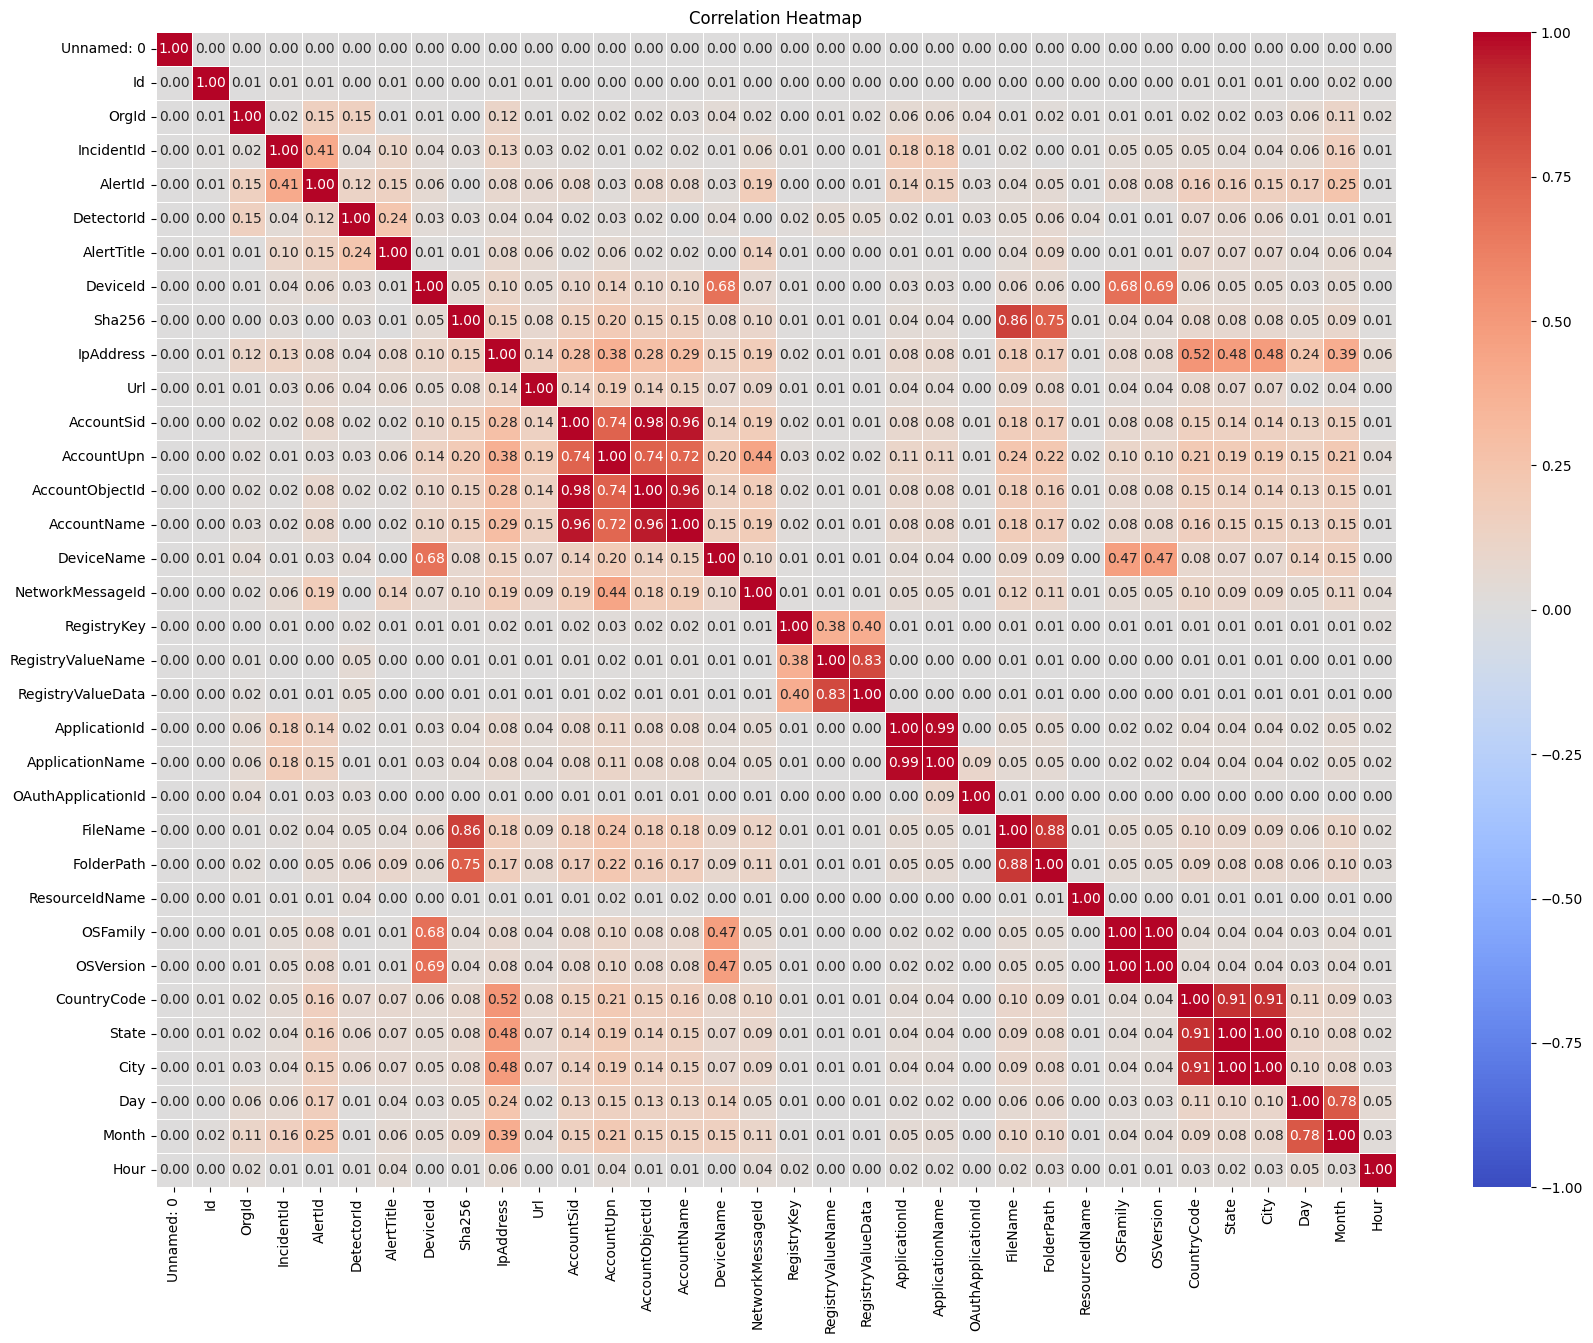

In [ ]:
# Select numerical columns
numerical_df = data_cleaned.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numerical_df.corr().abs()

# Plot the heatmap
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Setting a correlation threshold
threshold = 0.8

# Find pairs of columns with high correlations
high_corr_var = np.where(corr_matrix > threshold)
high_corr_pairs = [(numerical_df.columns[x], numerical_df.columns[y])
                    for x, y in zip(*high_corr_var)
                    if x != y and x < y]

# Create a list of columns to remove
columns_to_remove = set()
for col1, col2 in high_corr_pairs:
    columns_to_remove.add(col2)  # or col1, based on your strategy

# Convert to list
columns_to_remove = list(columns_to_remove)

#print(columns_to_remove)
# Drop the redundant columns
df_cleaned_corr = data_cleaned.drop(columns=columns_to_remove)

# Verify the cleaned DataFrame
print("Columns removed:", columns_to_remove)
print(df_cleaned_corr.head())

Columns removed: ['FileName', 'City', 'AccountObjectId', 'AccountName', 'ApplicationName', 'RegistryValueData', 'State', 'OSVersion', 'FolderPath']
   Unnamed: 0             Id  OrgId  IncidentId  AlertId  DetectorId  \
0     5172780  1709396985476     26       18583   687462          31   
1     8470561   927712939180     33        5065     3990          38   
2     5897583  1090921697002    201      150787   807590         419   
3     3288552  1434519079555    204      108287    28575          44   
4     4060961  1005022347708     54      528202  1458226         102   

   AlertTitle            Category   IncidentGrade EntityType EvidenceRole  \
0         813             Malware  BenignPositive       File      Related   
1          25              Impact  BenignPositive    Machine     Impacted   
2         444           Execution  BenignPositive    Machine     Impacted   
3        1233  SuspiciousActivity    TruePositive       File      Related   
4       58829        Exfiltration 

In [ ]:
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from scipy.stats import pearsonr


categorical_cols = df_cleaned_corr.select_dtypes(include=['object']).columns

# Initialize a dictionary to hold the label encoders
label_encoders = {}

# Apply LabelEncoder to each categorical column
for column in categorical_cols:
    le = LabelEncoder()
    df_cleaned_corr[column] = le.fit_transform(df_cleaned_corr[column])
    label_encoders[column] = le

# The DataFrame now has label-encoded categorical columns and any numerical columns
print(df_cleaned_corr.head())

   Unnamed: 0             Id  OrgId  IncidentId  AlertId  DetectorId  \
0     5172780  1709396985476     26       18583   687462          31   
1     8470561   927712939180     33        5065     3990          38   
2     5897583  1090921697002    201      150787   807590         419   
3     3288552  1434519079555    204      108287    28575          44   
4     4060961  1005022347708     54      528202  1458226         102   

   AlertTitle  Category  IncidentGrade  EntityType  EvidenceRole  DeviceId  \
0         813        12              0           9             1     98799   
1          25         9              0          17             0     98799   
2         444         6              0          17             0     98799   
3        1233        16              2           9             1     98799   
4       58829         7              0           9             0     98799   

   Sha256  IpAddress     Url  AccountSid  AccountUpn  DeviceName  \
0    1296     360606  160396  

In [ ]:
import joblib
import os

# Create the 'labels' directory if it doesn't exist
os.makedirs('labels', exist_ok=True)

# Save label encoders for categorical features
for column, le in label_encoders.items():
    joblib.dump(le, f'labels/{column}_label_encoder.pkl')

In [ ]:
#just saving for easy use: processed removing duplicates, null values and converted datetime
# also removed one of the co-related features to avoid multi colinearlity
# also label encoded and saved them in pkl and now saving to csv)
df_cleaned_corr.to_csv('train_data_processed.csv', index=False)

In [ ]:
df_cleaned_corr.head()

,Unnamed: 0,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,ApplicationId,OAuthApplicationId,ResourceIdName,OSFamily,CountryCode,Day,Month,Hour
0,5172780,1709396985476,26,18583,687462,31,813,12,0,9,1,98799,1296,360606,160396,441377,673934,153085,529644,1631,635,2251,881,3586,5,242,6,6,5
1,8470561,927712939180,33,5065,3990,38,25,9,0,17,0,98799,138268,360606,160396,441377,673934,3142,529644,1631,635,2251,881,3586,5,242,3,6,10
2,5897583,1090921697002,201,150787,807590,419,444,6,0,17,0,98799,138268,360606,160396,441377,673934,4181,529644,1631,635,2251,881,3586,5,242,13,6,3
3,3288552,1434519079555,204,108287,28575,44,1233,16,2,9,1,98799,138268,360606,160396,441377,673934,153085,529644,1631,635,2251,881,3586,5,242,8,6,16
4,4060961,1005022347708,54,528202,1458226,102,58829,7,0,9,0,98799,138268,360606,160396,441377,673934,153085,529644,1631,635,2251,881,3586,5,242,9,6,2


**Test Dataset**

In [ ]:
import zipfile
import pandas as pd

# Step 1: Unzip the file
with zipfile.ZipFile('GUIDE_Test.csv.zip', 'r') as zip_ref:
    zip_ref.extractall()  # Extracts to the current directory

In [ ]:
df_test = pd.read_csv('GUIDE_Test.csv')
df_test.head()

<ipython-input-2-8730df323686>:1: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df_test = pd.read_csv('GUIDE_Test.csv')


,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,Usage
0,1245540519230,657,11767,87199,2024-06-04T22:56:27.000Z,524,563,LateralMovement,T1021;T1047;T1105;T1569.002,BenignPositive,...,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Private
1,1400159342154,3,91158,632273,2024-06-03T12:58:26.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,0,0,NaN,Suspicious,Suspicious,242,1445,10630,Public
2,1279900255923,145,32247,131719,2024-06-08T03:20:49.000Z,2932,10807,LateralMovement,T1021;T1027.002;T1027.005;T1105,BenignPositive,...,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Public
3,60129547292,222,15294,917686,2024-06-12T12:07:31.000Z,0,0,InitialAccess,T1078;T1078.004,FalsePositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4,515396080539,363,7615,5944,2024-06-06T17:42:05.000Z,27,18,Discovery,T1087;T1087.002,BenignPositive,...,Suspicious,5,66,NaN,NaN,NaN,242,1445,10630,Public


In [ ]:
df_test.drop_duplicates(inplace=True)

In [ ]:
df_test.isna().sum()

,0
Id,0
OrgId,0
IncidentId,0
AlertId,0
Timestamp,0
DetectorId,0
AlertTitle,0
Category,0
MitreTechniques,2307084
IncidentGrade,0


In [ ]:
df_test['Timestamp'] = pd.to_datetime(df_test['Timestamp'])

In [ ]:
# Extract day, month, and hour from the Timestamp
df_test['Day'] = df_test['Timestamp'].dt.day
df_test['Month'] = df_test['Timestamp'].dt.month
df_test['Hour'] = df_test['Timestamp'].dt.hour

# Drop the original Timestamp column
df_test.drop('Timestamp', axis=1, inplace=True)

# Check the new DataFrame
print(df_test.head())

              Id  OrgId  IncidentId  AlertId  DetectorId  AlertTitle  \
0  1245540519230    657       11767    87199         524         563   
1  1400159342154      3       91158   632273           2           2   
2  1279900255923    145       32247   131719        2932       10807   
3    60129547292    222       15294   917686           0           0   
4   515396080539    363        7615     5944          27          18   

            Category                  MitreTechniques   IncidentGrade  \
0    LateralMovement      T1021;T1047;T1105;T1569.002  BenignPositive   
1  CommandAndControl                              NaN  BenignPositive   
2    LateralMovement  T1021;T1027.002;T1027.005;T1105  BenignPositive   
3      InitialAccess                  T1078;T1078.004   FalsePositive   
4          Discovery                  T1087;T1087.002  BenignPositive   

  ActionGrouped  ... AntispamDirection SuspicionLevel LastVerdict  \
0           NaN  ...               NaN     Suspicious  Susp

In [ ]:
df_test.drop(['AccountObjectId', 'ApplicationName', 'FolderPath', 'State', 'FileName', 'OSVersion', 'AccountName', 'City', 'RegistryValueData'],axis=1, inplace= True)

In [ ]:
df_test.drop('Usage',axis=1,inplace=True)

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4147888 entries, 0 to 4147991
Data columns (total 38 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  int64  
 1   OrgId               int64  
 2   IncidentId          int64  
 3   AlertId             int64  
 4   DetectorId          int64  
 5   AlertTitle          int64  
 6   Category            object 
 7   MitreTechniques     object 
 8   IncidentGrade       object 
 9   ActionGrouped       object 
 10  ActionGranular      object 
 11  EntityType          object 
 12  EvidenceRole        object 
 13  DeviceId            int64  
 14  Sha256              int64  
 15  IpAddress           int64  
 16  Url                 int64  
 17  AccountSid          int64  
 18  AccountUpn          int64  
 19  DeviceName          int64  
 20  NetworkMessageId    int64  
 21  EmailClusterId      float64
 22  RegistryKey         int64  
 23  RegistryValueName   int64  
 24  ApplicationId       int64  
 

In [ ]:
df_test = df_test[['Id','OrgId','IncidentId', 'AlertId','DetectorId','AlertTitle','Category','IncidentGrade','EntityType','EvidenceRole','DeviceId','Sha256','IpAddress','Url','AccountSid','AccountUpn','DeviceName','NetworkMessageId','RegistryKey','RegistryValueName','ApplicationId','OAuthApplicationId','ResourceIdName','OSFamily','CountryCode','Day','Month','Hour']]
df_test.head()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,...,RegistryKey,RegistryValueName,ApplicationId,OAuthApplicationId,ResourceIdName,OSFamily,CountryCode,Day,Month,Hour
0,1245540519230,657,11767,87199,524,563,LateralMovement,BenignPositive,User,Impacted,...,1631,635,2251,881,3586,5,242,4,6,22
1,1400159342154,3,91158,632273,2,2,CommandAndControl,BenignPositive,Machine,Impacted,...,1631,635,2251,881,3586,0,242,3,6,12
2,1279900255923,145,32247,131719,2932,10807,LateralMovement,BenignPositive,Process,Related,...,1631,635,2251,881,3586,5,242,8,6,3
3,60129547292,222,15294,917686,0,0,InitialAccess,FalsePositive,CloudLogonSession,Related,...,1631,635,2251,881,3586,5,242,12,6,12
4,515396080539,363,7615,5944,27,18,Discovery,BenignPositive,User,Impacted,...,1631,635,2251,881,3586,5,242,6,6,17


In [ ]:
# Load label encoder

import joblib
loaded_label_encoders = {}
categorical_cols = ['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole']  # list your categorical columns
for column in categorical_cols:
    loaded_label_encoders[column] = joblib.load(f'labels/{column}_label_encoder.pkl')

In [ ]:
# Apply label encoding to categorical features
for column, le in loaded_label_encoders.items():
    if column in df_test.columns:
        df_test[column] = le.transform(df_test[column])

df_test.head()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,...,RegistryKey,RegistryValueName,ApplicationId,OAuthApplicationId,ResourceIdName,OSFamily,CountryCode,Day,Month,Hour
0,1245540519230,657,11767,87199,524,563,11,0,30,0,...,1631,635,2251,881,3586,5,242,4,6,22
1,1400159342154,3,91158,632273,2,2,1,0,17,0,...,1631,635,2251,881,3586,0,242,3,6,12
2,1279900255923,145,32247,131719,2932,10807,11,0,25,1,...,1631,635,2251,881,3586,5,242,8,6,3
3,60129547292,222,15294,917686,0,0,10,1,7,1,...,1631,635,2251,881,3586,5,242,12,6,12
4,515396080539,363,7615,5944,27,18,5,0,30,0,...,1631,635,2251,881,3586,5,242,6,6,17


In [ ]:
df_test.to_csv('test_data_processed.csv', index=False)

**4. Model Training and Evaluation**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder


In [ ]:
df_train = pd.read_csv('train_data_processed.csv')
df_train.head()

,Unnamed: 0,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,...,RegistryKey,RegistryValueName,ApplicationId,OAuthApplicationId,ResourceIdName,OSFamily,CountryCode,Day,Month,Hour
0,5172780,1709396985476,26,18583,687462,31,813,12,0,9,...,1631,635,2251,881,3586,5,242,6,6,5
1,8470561,927712939180,33,5065,3990,38,25,9,0,17,...,1631,635,2251,881,3586,5,242,3,6,10
2,5897583,1090921697002,201,150787,807590,419,444,6,0,17,...,1631,635,2251,881,3586,5,242,13,6,3
3,3288552,1434519079555,204,108287,28575,44,1233,16,2,9,...,1631,635,2251,881,3586,5,242,8,6,16
4,4060961,1005022347708,54,528202,1458226,102,58829,7,0,9,...,1631,635,2251,881,3586,5,242,9,6,2


In [ ]:
#Splitting data
X= df_train.drop('IncidentGrade',axis=1)
y= df_train['IncidentGrade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Selecting top features using anova
from sklearn.feature_selection import f_classif, SelectKBest

selector = SelectKBest(score_func=f_classif, k=15)  # Adjust k as needed
X_new = selector.fit_transform(X_train, y_train)

selected_features = X_train.columns[selector.get_support()]
print("Selected Features:", selected_features)

Selected Features: Index(['OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'EntityType', 'EvidenceRole', 'Sha256', 'IpAddress',
       'AccountSid', 'DeviceName', 'NetworkMessageId', 'CountryCode', 'Day'],
      dtype='object')


In [ ]:
X_new=X[['OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'EntityType', 'EvidenceRole', 'Sha256', 'IpAddress',
       'AccountSid', 'DeviceName', 'NetworkMessageId', 'CountryCode', 'Day']]
X_new.head()

,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,EntityType,EvidenceRole,Sha256,IpAddress,AccountSid,DeviceName,NetworkMessageId,CountryCode,Day
0,26,18583,687462,31,813,12,9,1,1296,360606,441377,153085,529644,242,6
1,33,5065,3990,38,25,9,17,0,138268,360606,441377,3142,529644,242,3
2,201,150787,807590,419,444,6,17,0,138268,360606,441377,4181,529644,242,13
3,204,108287,28575,44,1233,16,9,1,138268,360606,441377,153085,529644,242,8
4,54,528202,1458226,102,58829,7,9,0,138268,360606,441377,153085,529644,242,9


In [ ]:
#Training train data with selected features

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Initialize the models
model_rf = RandomForestClassifier(random_state=42)
model_xgb = XGBClassifier(random_state=42)

#RANDOM FOREST
print(f"\nEvaluating RandomForest...")

# Fit the model
model_rf.fit(X_train, y_train)

# Predict on test data
y_pred_rf = model_rf.predict(X_test)

# Print accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

#XGBOOST
print(f"\nEvaluating XGBoost...")

# Fit the model
model_xgb.fit(X_train, y_train)

# Predict on test data
y_pred_xgb = model_xgb.predict(X_test)

# Print accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))


Evaluating RandomForest...
Accuracy: 0.9804358873315028
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98    411114
           1       0.98      0.97      0.97    203012
           2       0.99      0.98      0.98    332403

    accuracy                           0.98    946529
   macro avg       0.98      0.98      0.98    946529
weighted avg       0.98      0.98      0.98    946529


Evaluating XGBoost...
Accuracy: 0.9172555727294145
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92    411114
           1       0.93      0.85      0.89    203012
           2       0.94      0.91      0.93    332403

    accuracy                           0.92    946529
   macro avg       0.92      0.91      0.91    946529
weighted avg       0.92      0.92      0.92    946529



In [ ]:
import joblib

# Save the trained RandomForest model to a file
joblib.dump(model_rf, 'model/random_forest_model.pkl')

NameError: name 'model_rf' is not defined

In [ ]:
df_test = pd.read_csv('test_data_processed.csv')
df_test.head()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,...,RegistryKey,RegistryValueName,ApplicationId,OAuthApplicationId,ResourceIdName,OSFamily,CountryCode,Day,Month,Hour
0,1245540519230,657,11767,87199,524,563,11,0,30,0,...,1631,635,2251,881,3586,5,242,4,6,22
1,1400159342154,3,91158,632273,2,2,1,0,17,0,...,1631,635,2251,881,3586,0,242,3,6,12
2,1279900255923,145,32247,131719,2932,10807,11,0,25,1,...,1631,635,2251,881,3586,5,242,8,6,3
3,60129547292,222,15294,917686,0,0,10,1,7,1,...,1631,635,2251,881,3586,5,242,12,6,12
4,515396080539,363,7615,5944,27,18,5,0,30,0,...,1631,635,2251,881,3586,5,242,6,6,17


In [ ]:
X2 = df_test[['OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'EntityType', 'EvidenceRole', 'Sha256', 'IpAddress',
       'AccountSid', 'DeviceName', 'NetworkMessageId', 'CountryCode', 'Day']]
y2= df_test['IncidentGrade']

In [ ]:
# Load the model from file
loaded_model_rf = joblib.load('model/random_forest_model.pkl')

In [ ]:
y_pred_new = loaded_model_rf.predict(X2)

In [ ]:
import pandas as pd
import joblib
from sklearn.metrics import accuracy_score, classification_report # Import accuracy_score and classification_report


print("Accuracy:", accuracy_score(y2, y_pred_new)) # Now accuracy_score is defined
print("Classification Report:")
print(classification_report(y2, y_pred_new)) # Now classification_report is defined

Accuracy: 0.9270691494080843
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93   1752895
           1       0.91      0.88      0.89    902664
           2       0.94      0.94      0.94   1492329

    accuracy                           0.93   4147888
   macro avg       0.92      0.92      0.92   4147888
weighted avg       0.93      0.93      0.93   4147888

